# Space Severe dataset (Dynamics Projects M20 Number 8)

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('space.csv')
data

#### FEATURE COLUMNS 
# objid = Object Identifier
# ra = J2000 Right Ascension (r-band)
# dec = J2000 Declination (r-band)
# u = better of DeV/Exp magnitude fit
# g = better of DeV/Exp magnitude fit
# r = better of DeV/Exp magnitude fit
# i = better of DeV/Exp magnitude fit
# z = better of DeV/Exp magnitude fit
# run = Run Number
# rereun = Rerun Number
# camcol = Camera column
# field = Field number
# specobjid = Object Identifier
# redshift = Final Redshift
# plate = plate number
# mjd = MJD of observation
# fiberid = fiber ID

#### TARGET COLUMN - Class = object class (galaxy, star or quasar object)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df=pd.DataFrame(data=data)
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


# EDA

In [4]:
df1=df.copy()
df1.info()
# No Missing values present
# 17 numerical columns (10 float type & 7 integer type)
# 1 object column (Target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
df1.describe()
# count -> total 10,000 rows present
# skew ness - ra, dec,u,speobjid,redshift,plate,mjd carries skewed data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
df1.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [7]:
df1.skew() 
# checking skewness

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [8]:
le=LabelEncoder()
df1['class']=le.fit_transform(df1['class'])
# converting object data into numerical data

In [9]:
for i in df1['class'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

2=['STAR']
0=['GALAXY']
1=['QSO']


In [10]:
df1['objid'].unique()
# we can drop this column since it carrying uniform value to all rows

array([1.23765e+18])

# Univarite Analysis

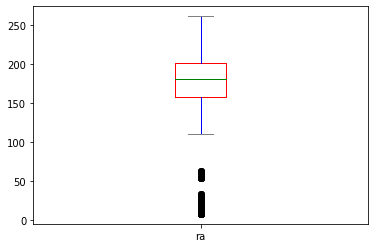

In [11]:
c={'boxes':'Red','whiskers':'Blue','medians':'Green','caps':'Grey'}
# fixing the color for boxplot
df1['ra'].plot.box(color=c)
# outliers present

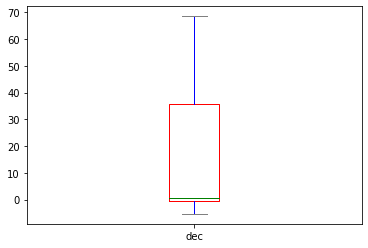

In [12]:
df1['dec'].plot.box(color=c)
# outliers not present

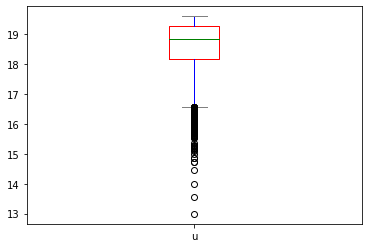

In [13]:
df1['u'].plot.box(color=c)
# outliers present

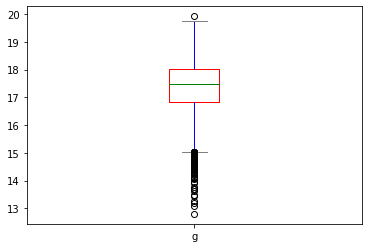

In [14]:
df1['g'].plot.box(color=c)
# outliers present

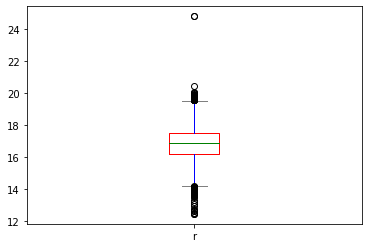

In [15]:
df1['r'].plot.box(color=c)
# outliers present

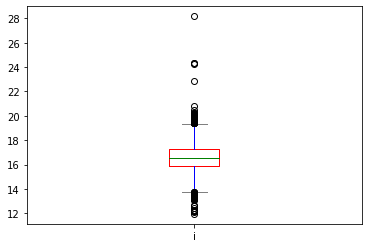

In [16]:
df1['i'].plot.box(color=c)
# outliers present

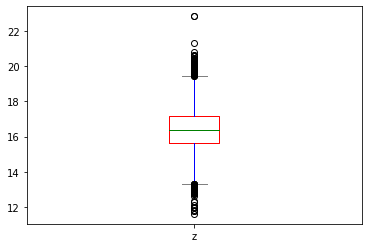

In [17]:
df1['z'].plot.box(color=c)
# outliers present

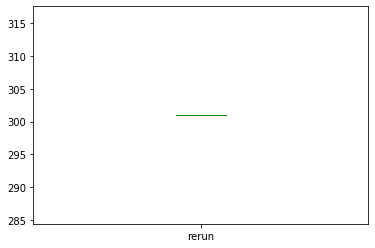

In [18]:
df1['rerun'].plot.box(color=c)
# we can drop this column

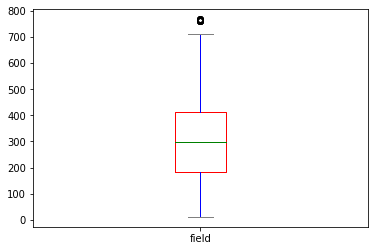

In [19]:
df1['field'].plot.box(color=c)
# outliers present

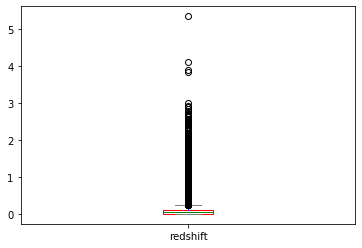

In [20]:
df1['redshift'].plot.box(color=c)
# outliers present

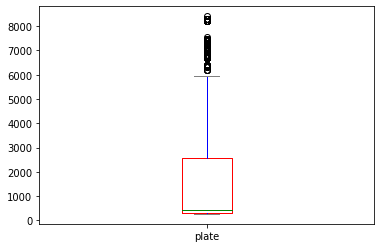

In [21]:
df1['plate'].plot.box(color=c)
# outliers present

# Cleaning the datset 

In [22]:
df2=df1.drop(['rerun','objid'],axis=1)
df2.head()
# lets drop the columns which are not neccessary to predict the outcome

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512


In [23]:
z=np.abs(zscore(df2))
print(np.where(z>3))
# Lets remove the outliers

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64), array([12, 12, 12, ..., 13, 10, 13], dtype=int64))


In [24]:
df2n=df2[(z<3).all(axis=1)]
df2n.shape
# this dataset is realtibely clean and can used for training the model

(8698, 16)

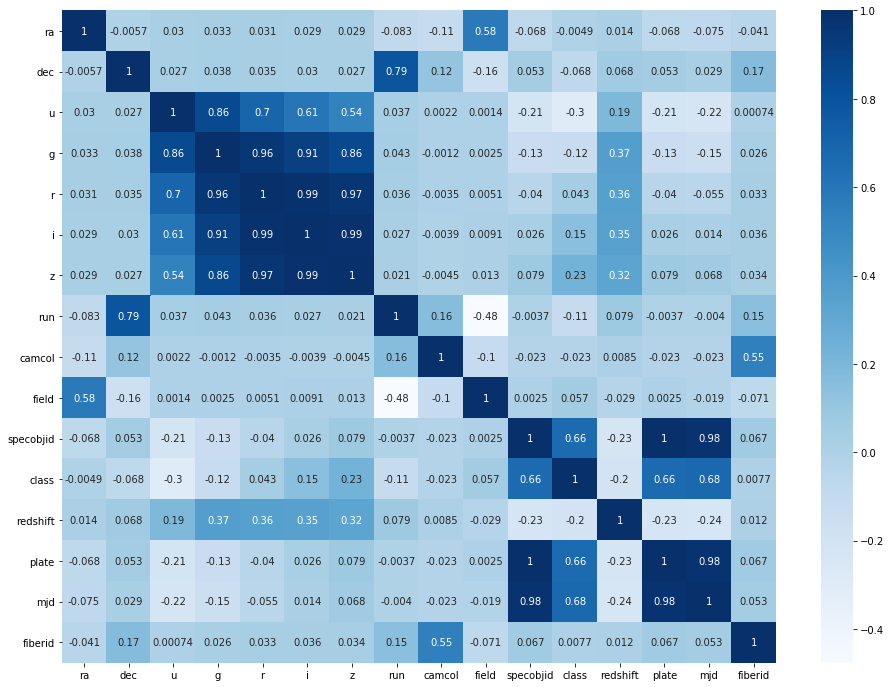

In [25]:
plt.figure(figsize=(16,12))
sns.heatmap(df2n.corr(),cmap='Blues',annot=True)
# lets see the corelation 
# Target attributes is having potive corealtion with most of the feature attributes baring 'u' & 'run'

In [26]:
x=df2n.drop('class',axis=1)
y=df2n['class']
# lets segregate feature & target attributes

In [27]:
xpca=PCA(n_components=10)
x=xpca.fit_transform(x)
# as we can observe column u,g,r,i,z are very closely corealted with each other. so lets applt PCA in order train the model better

In [28]:
x
# now this feture columns are in the form of array

array([[ 2.39450036e+18,  1.60989586e+02, -7.83326383e+01, ...,
         1.22113170e+00,  9.32636922e-03, -1.71483179e+00],
       [-9.64045642e+17,  1.66281166e+02,  3.12392091e+02, ...,
         2.65228289e-01,  3.93343855e-01,  1.91684538e-01],
       [-1.00458564e+18,  1.52983255e+02, -1.28751416e+02, ...,
        -1.49561466e+00,  2.84910893e-01, -4.28359629e-01],
       ...,
       [-8.24519642e+17, -3.75009076e+02,  1.57580188e+02, ...,
        -3.23811276e-01,  4.54591737e-01,  6.71004737e-01],
       [-8.24519642e+17, -3.74831115e+02,  1.57784927e+02, ...,
        -1.45474306e+00,  4.23017350e-01,  3.70398233e-01],
       [-8.24518642e+17, -3.75471431e+02,  1.58268704e+02, ...,
         8.60783233e-01,  5.11273167e-01, -8.67534331e-01]])

In [29]:
m=MinMaxScaler()
x=m.fit_transform(x)
# lets apply mimmax sclaing technique in order to remove skewness and regularize the data. 

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70,test_size=0.3)
# splitting the dataset into trainig and testing part

In [31]:
# Since the Target is categorical, we need to apply several classification algorithms to train the model and see which yields better results

In [32]:
# Lets identify the parameters for DecisionTreeClassifier with the helpf of GridsearchCV

dtc=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
grid=GridSearchCV(dtc,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.85123549976164
{'criterion': 'entropy'}


In [33]:
# Now lets train the model
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.8708812260536398
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1400
           1       0.59      0.66      0.62       122
           2       0.88      0.85      0.86      1088

    accuracy                           0.87      2610
   macro avg       0.79      0.80      0.80      2610
weighted avg       0.87      0.87      0.87      2610

[[1265   27  108]
 [  18   80   24]
 [ 132   28  928]]
Cross_val_score is:
 0.8480138169257339


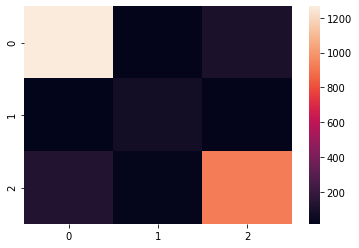

In [34]:
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(dtc,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [35]:
#  Lets identify the parameters for KNeighborsClassifier with the helpf of GridsearchCV

knn= KNeighborsClassifier()
param_grid={'n_neighbors':[5,10,15,20,25,30]}
grid=GridSearchCV(knn,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.8627334604587107
{'n_neighbors': 10}


In [50]:
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
# lets train the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

0.8773946360153256
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1400
           1       0.76      0.61      0.68       122
           2       0.92      0.80      0.86      1088

    accuracy                           0.88      2610
   macro avg       0.85      0.79      0.81      2610
weighted avg       0.88      0.88      0.88      2610

[[1341    6   53]
 [  25   74   23]
 [ 196   17  875]]
Cross_val_score is:
 0.8653735135886289


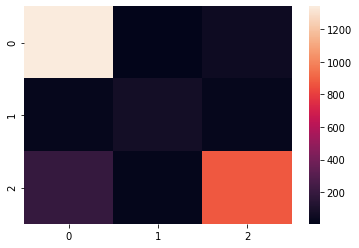

In [51]:
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(knn,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [52]:
# # Lets identify the parameters for MultinomialNB with the helpf of GridsearchCV

mb=MultinomialNB()
param_grid={'alpha':[10,1,0.1,0.01,0.001,0],'fit_prior':['True','False']}
grid=GridSearchCV(mb,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.825024630541872
{'alpha': 1, 'fit_prior': 'True'}


In [53]:
mb=MultinomialNB(alpha=1,fit_prior=True)
mb.fit(x_train,y_train)
# lets train the model

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

0.8245210727969349
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1400
           1       0.00      0.00      0.00       122
           2       0.95      0.72      0.82      1088

    accuracy                           0.82      2610
   macro avg       0.57      0.57      0.56      2610
weighted avg       0.81      0.82      0.80      2610

[[1367    0   33]
 [ 116    0    6]
 [ 303    0  785]]
Cross_val_score is:
 0.8250199511643141


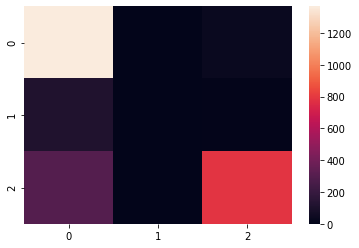

In [54]:
pred=mb.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(mb,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [41]:
# as we can observe none of the above algorithms are giving accuracy score more than 0.9
# so lets try to boost the score with the help of ensemble methods

In [42]:
rf=RandomForestClassifier(n_estimators=150,random_state=50)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [43]:
pred=rf.predict(x_test)
rf.score(x_train,y_train)
# So lets settle with this 

1.0

0.9103448275862069
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1400
           1       0.83      0.63      0.72       122
           2       0.91      0.90      0.90      1088

    accuracy                           0.91      2610
   macro avg       0.88      0.82      0.85      2610
weighted avg       0.91      0.91      0.91      2610

[[1324    6   70]
 [  13   77   32]
 [ 103   10  975]]


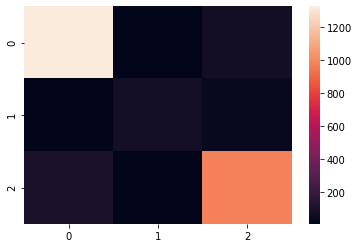

In [44]:
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))

In [45]:
pred

array([0, 0, 0, ..., 0, 2, 0])

In [55]:
joblib.dump(rf,'rfspace.obj')## Saving the model

['rfspace.obj']